In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set()
%matplotlib inline

In [2]:
!pip install scikit-learn==0.22.1
!pip install imbalanced-learn
!pip install imblearn

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


Read the xls data into a Pandas dataframe

In [3]:
df = pd.read_excel('/home/ec2-user/SageMaker/default of credit card clients.xls',header = 1)

Check the dataframe by printing the first 5 rows of the dataset.  



In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

get the columns types

In [6]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

we can see that ther's some missing values in EDUCATION,MARRIAGE  

lets explore object data

In [8]:
print(df['MARRIAGE'].unique())
print(df['SEX'].unique())
print(df['EDUCATION'].unique())



['married' 'single' nan 0]
['female' 'male']
['university' 'graduate school' 'others' 'high school' nan 0]


we can see that both MARRIAGE and EDUCATION columns have wrong type value which is 0 we need to deal with that first 

In [9]:
def remove_0(i):
    if i == 0 : 
        return pd.np.nan
    
    return i

In [10]:
df['MARRIAGE'] = df['MARRIAGE'].map(remove_0)
df['EDUCATION'] = df['EDUCATION'].map(remove_0)
print(df['MARRIAGE'].unique())
print(df['EDUCATION'].unique())


['married' 'single' nan]
['university' 'graduate school' 'others' 'high school' nan]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  app.launch_new_instance()


In [11]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
Name: MARRIAGE, dtype: int64

In [12]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               124
Name: EDUCATION, dtype: int64

In [13]:
print(df.isnull().sum())


ID                              0
LIMIT_BAL                       0
SEX                             0
EDUCATION                     345
MARRIAGE                      377
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64


Next we need to deal with null values in both  EDUCATION & MARRIAGE columns

In [14]:
df['EDUCATION'].fillna('others', inplace=True)
df['MARRIAGE'].fillna('married', inplace=True)
print(df['MARRIAGE'].unique())
print(df['EDUCATION'].unique())

['married' 'single']
['university' 'graduate school' 'others' 'high school']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

we can convert object data in the followiing order 
MARRIAGE : marreid = 1 , single = 0 
SEX : male = 0 ,female = 1 
EDUCATION : do one hot encoding

In [16]:
mapped_marriage = {"married": 1, "single": 0}
df['MARRIAGE'] = df['MARRIAGE'].map(lambda x: mapped_marriage[x])

mapped_sex = {"female": 1, "male": 0}
df['SEX'] = df['SEX'].map(lambda x: mapped_sex[x])

one_hot_eduction = pd.get_dummies(df['EDUCATION'])

# Join the encoded df
df = df.join(one_hot_eduction)


df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
0,1,20000,1,university,1,24,2,2,-1,-1,...,689,0,0,0,0,1,0,0,0,1
1,2,120000,1,university,0,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,0,0,0,1
2,3,90000,1,university,0,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,4,50000,1,university,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,5,50000,0,university,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [17]:
#drop the converted columns
df = df.drop('EDUCATION',axis = 1)
df = df.drop('ID',axis = 1)

df.head()


,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
0,20000,1,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,0,0,0,1
1,120000,1,0,26,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,0,0,0,1
2,90000,1,0,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,1,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,0,1,57,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [18]:
df['AGE'].describe()

count    30000.000000
mean        35.518833
std          9.528019
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max        267.000000
Name: AGE, dtype: float64

there's a weired max in AGE Column which could be considered  outliers

In [19]:
df[df.AGE > 80]['AGE']

4011     149
4116     126
5395     152
6963     140
7318     228
8940     267
29496    235
Name: AGE, dtype: int64

lets deal with them by replacing them by the mean and scale the AGE

In [20]:
age_mean = df['AGE'].mean()
def scaleAGE(i):
    if i > 80 : 
        return age_mean / 80
    
    return i/80

df['AGE'] = df['AGE'].map(scaleAGE)




In [21]:
df.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
0,20000,1,1,0.3000,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,0,0,0,1
1,120000,1,0,0.3250,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,0,0,0,1
2,90000,1,0,0.4250,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,1,1,0.4625,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,0,1,0.7125,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [22]:
df.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.603733,0.467867,0.443549,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.352833,0.163867,0.015633,0.467667
std,129747.661567,0.489129,0.498975,0.115187,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.477859,0.370161,0.124054,0.498962
min,10000.000000,0.000000,0.000000,0.262500,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,0.350000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,1.000000,0.000000,0.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,1.000000,0.512500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000,0.987500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we could also scale PAY_0 : PAY_6 by adding 2 and dividing by 8 

In [23]:
def scalePay(i):
    return (i + 2) / 10

df['PAY_0'] = df['PAY_0'].map(scalePay)
df['PAY_2'] = df['PAY_2'].map(scalePay)
df['PAY_3'] = df['PAY_3'].map(scalePay)
df['PAY_4'] = df['PAY_4'].map(scalePay)
df['PAY_5'] = df['PAY_5'].map(scalePay)
df['PAY_6'] = df['PAY_6'].map(scalePay)


In [24]:
df.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.603733,0.467867,0.443549,0.19833,0.186623,0.183380,0.177933,0.173380,0.170890,...,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.352833,0.163867,0.015633,0.467667
std,129747.661567,0.489129,0.498975,0.115187,0.11238,0.119719,0.119687,0.116914,0.113319,0.114999,...,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.477859,0.370161,0.124054,0.498962
min,10000.000000,0.000000,0.000000,0.262500,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,0.000000,0.350000,0.10000,0.100000,0.100000,0.100000,0.100000,0.100000,...,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,1.000000,0.000000,0.425000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,...,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,1.000000,0.512500,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,...,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000,0.987500,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.rename(columns = {'default payment next month':'Default'}, inplace = True) 
df['Default'].value_counts()


0    23364
1     6636
Name: Default, dtype: int64

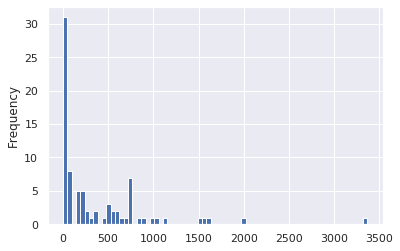

In [26]:
df['LIMIT_BAL'].value_counts().plot.hist(bins=70)
plt.show()

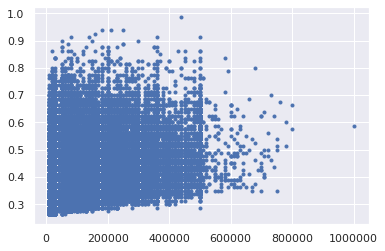

In [27]:
plt.plot(df['LIMIT_BAL'], df['AGE'],'.')

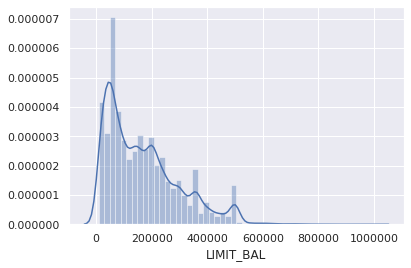

In [28]:
sns.distplot(df['LIMIT_BAL'])

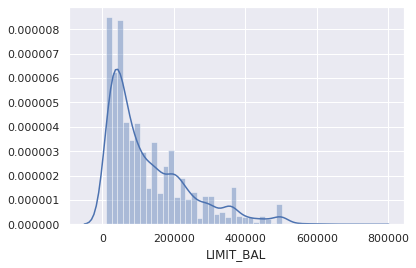

In [29]:
sns.distplot(df[df['Default'] == 1]['LIMIT_BAL'])

In [30]:
df.nunique()

LIMIT_BAL             81
SEX                    2
MARRIAGE               2
AGE                   57
PAY_0                 11
PAY_2                 11
PAY_3                 11
PAY_4                 11
PAY_5                 10
PAY_6                 10
BILL_AMT1          22723
BILL_AMT2          22346
BILL_AMT3          22026
BILL_AMT4          21548
BILL_AMT5          21010
BILL_AMT6          20604
PAY_AMT1            7943
PAY_AMT2            7899
PAY_AMT3            7518
PAY_AMT4            6937
PAY_AMT5            6897
PAY_AMT6            6939
Default                2
graduate school        2
high school            2
others                 2
university             2
dtype: int64

Get The corrleation

Text(0.5, 1, 'dataset correlation')

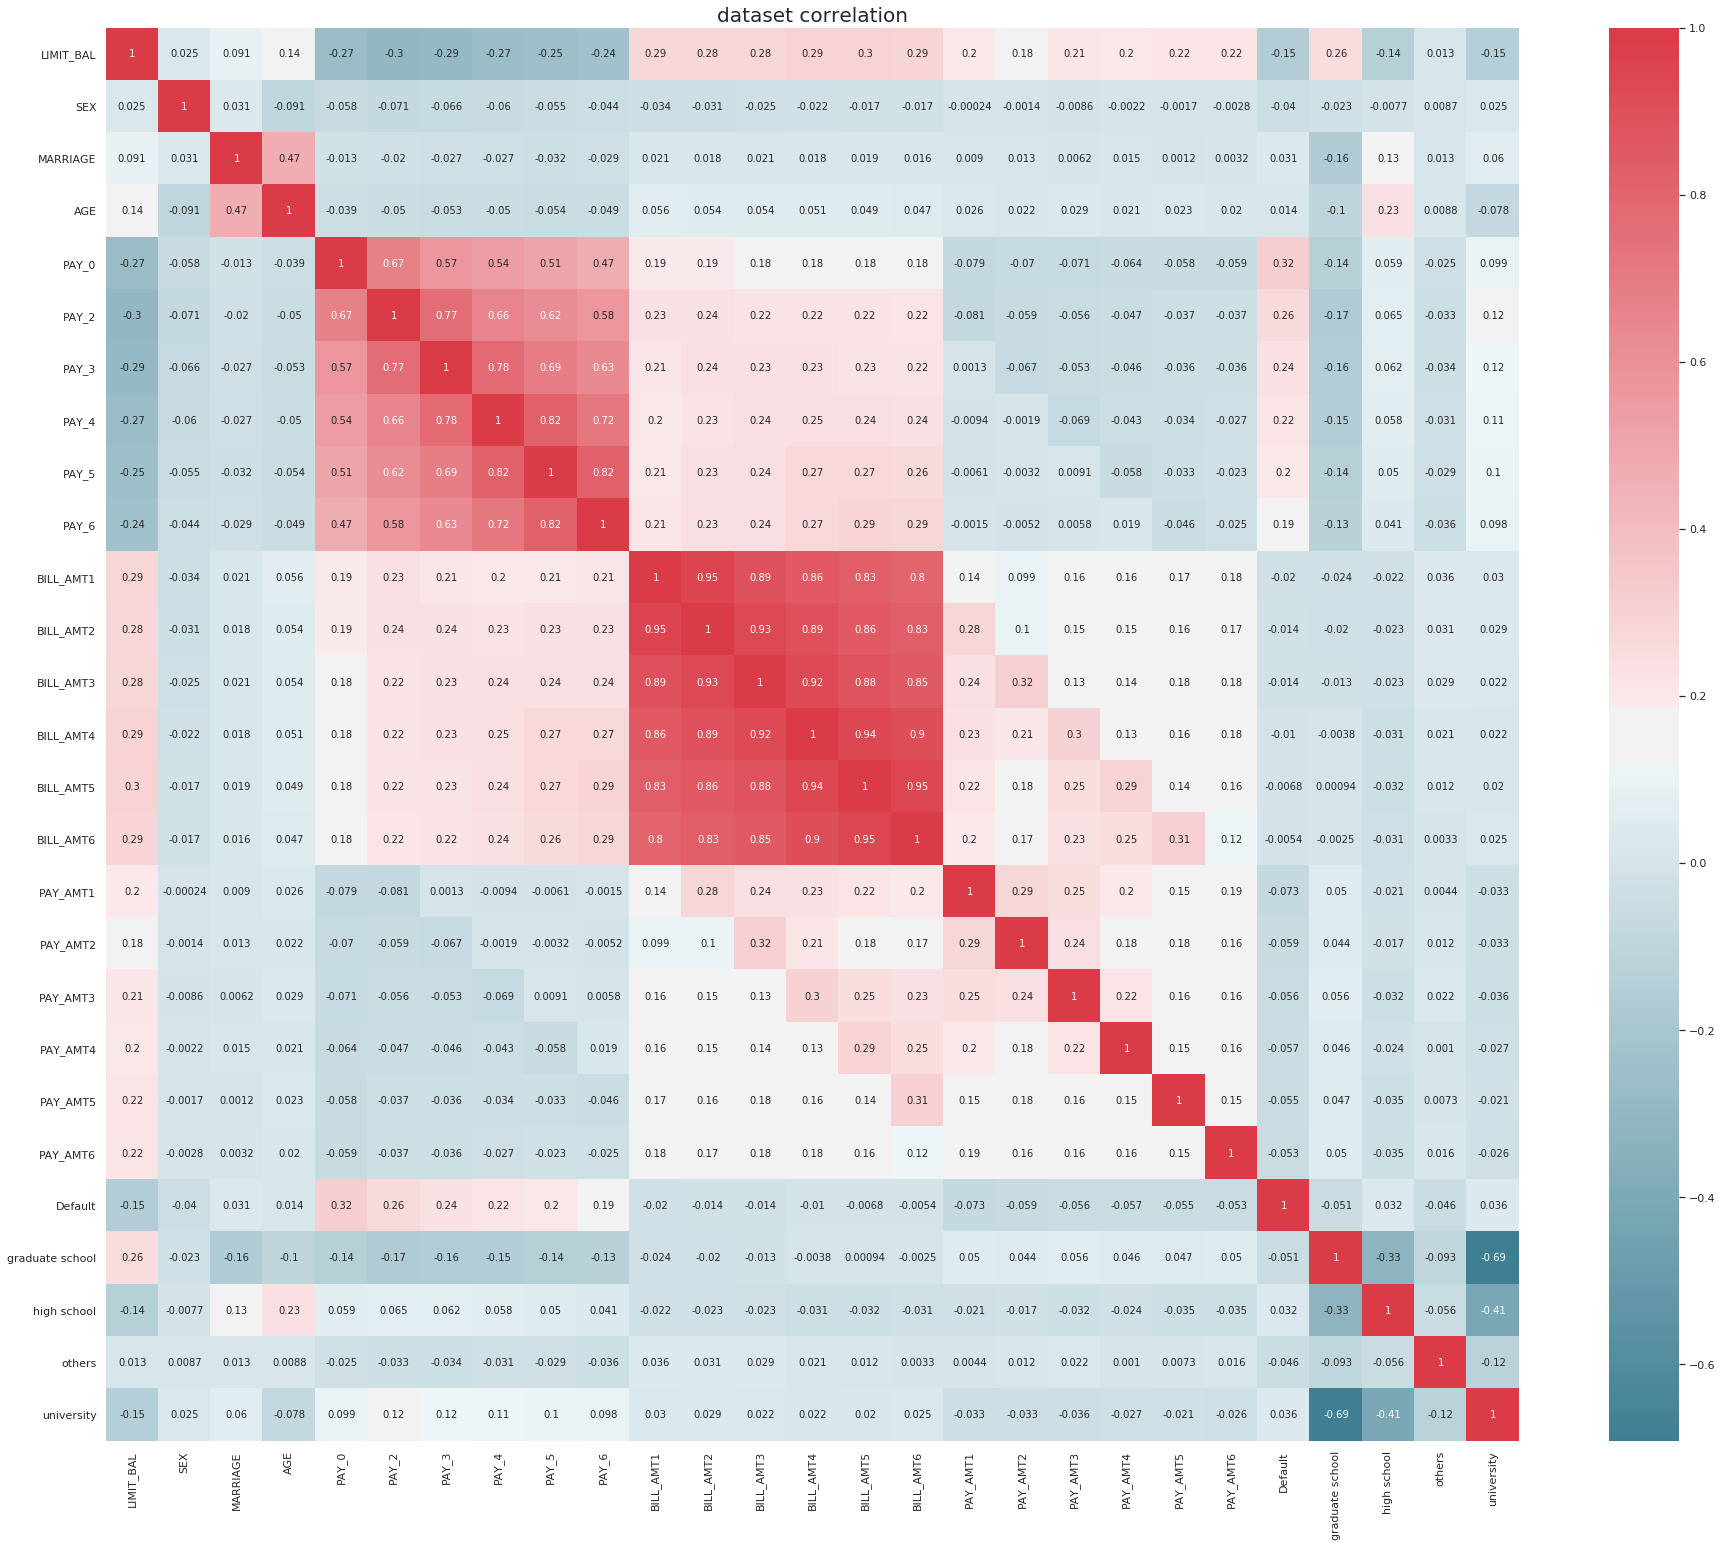

In [31]:

f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

we can find a strong correlation between bill_amt1 and bill_amt2 ,bill_amt2 & bill_amt3 , bill_amt4 & bill_amt3 ,bill_amt5 & bill_amt4 ,bill_amt6&bill_amt5
also negative correlation between single & married , female,male

In [32]:
df = df.drop(['BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1)

Text(0.5, 1, 'dataset correlation')

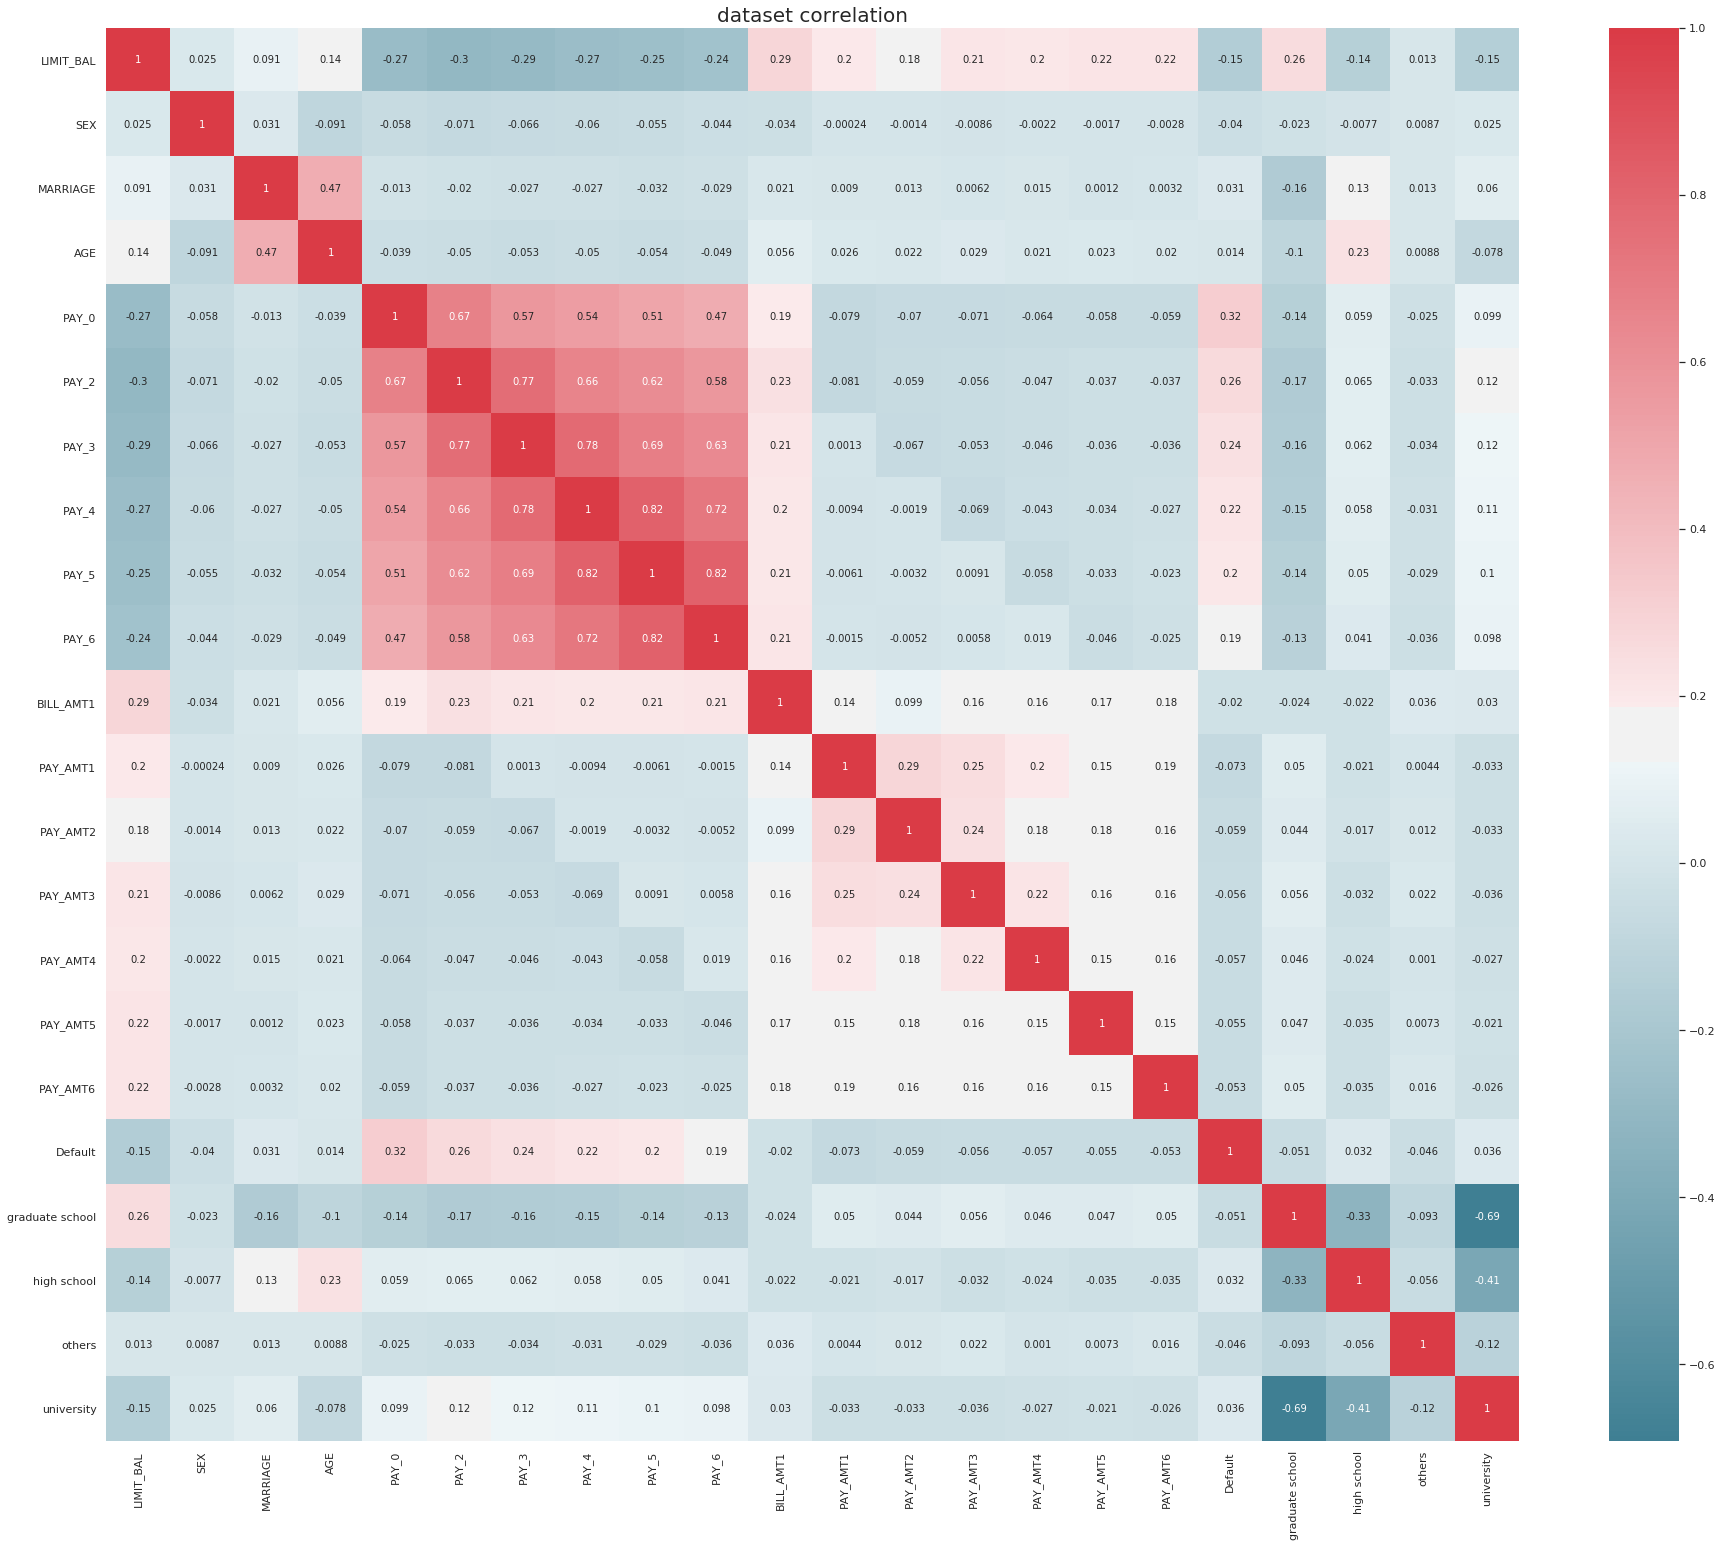

In [33]:
f, ax = plt.subplots(figsize=(32, 26))
corr = df.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

xs = np.array(df.drop(["Default"], axis=1)).astype("float32")
ys = np.array(df["Default"]).astype("float32")

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(xs,ys, test_size=0.2, shuffle=True, random_state=23)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.2, shuffle=True, random_state=23)


In [35]:

print(f"Length of train_features is: {X_train.shape}")
print(f"Length of val_features is: {X_val.shape}")
print(f"Length of test_features is: {X_test.shape}")


Length of train_features is: (24000, 21)
Length of val_features is: (4800, 21)
Length of test_features is: (1200, 21)


In [36]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
train_predictions = RF.predict(X_train)



Accuracy (training): 0.8044166666666667
Precision (training): 0.6941950927588271
Recall (training): 0.21710649447875724


Text(0.5, 1, 'Confusion Matrix')

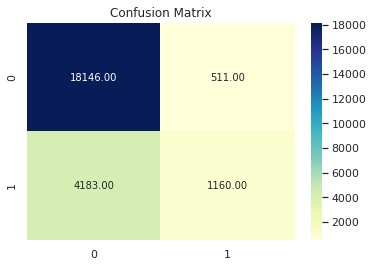

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score

print("Accuracy (training):", accuracy_score(y_train, train_predictions))
print("Precision (training):", precision_score(y_train, train_predictions))
print("Recall (training):", recall_score(y_train, train_predictions))

confusion_matrix_tab =  confusion_matrix(y_train, train_predictions)
sns.heatmap(confusion_matrix_tab, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')



In [38]:

RF.fit(X_test, y_test)
test_predictions = RF.predict(X_test)



Accuracy (test): 0.8141666666666667
Precision (test): 0.746268656716418
Recall (test): 0.1953125


Text(0.5, 1, 'Confusion Matrix')

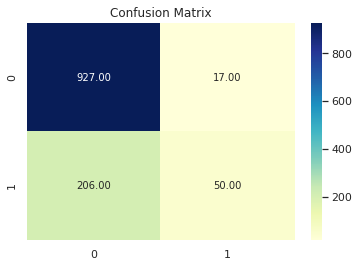

In [39]:
print("Accuracy (test):", accuracy_score(y_test, test_predictions))
print("Precision (test):", precision_score(y_test, test_predictions))
print("Recall (test):", recall_score(y_test, test_predictions))
confusion_matrix_tab_test =  confusion_matrix(y_test, test_predictions)
sns.heatmap(confusion_matrix_tab_test, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')

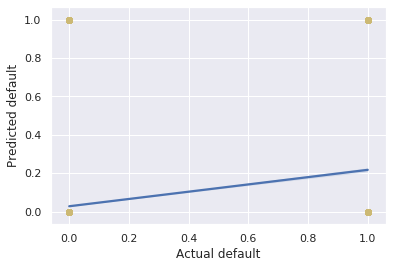

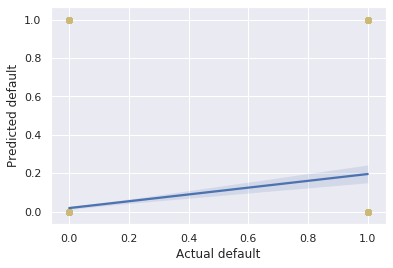

In [40]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_train, train_predictions, scatter_kws={'alpha':1, 'color':'y'})
plt.xlabel('Actual default')
plt.ylabel('Predicted default')
plt.show()

sb.regplot(y_test, test_predictions, scatter_kws={'alpha':0.3, 'color':'y'})
plt.xlabel('Actual default')
plt.ylabel('Predicted default')
plt.show()


let's see if we can enhance our prediction 

Text(0.5, 1.0, 'Original Distribution of the dataset')

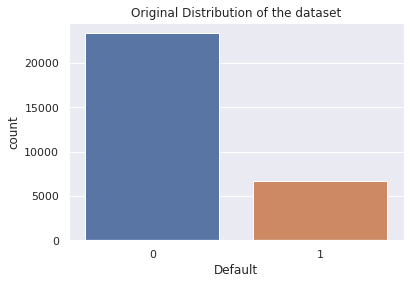

In [41]:
sns.countplot(df['Default'])
plt.title('Original Distribution of the dataset')

we could see that the data is unblanced we could use down or oversampling to blance this data

In [42]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensem

Text(0.5, 1.0, 'Original Distribution of the dataset')

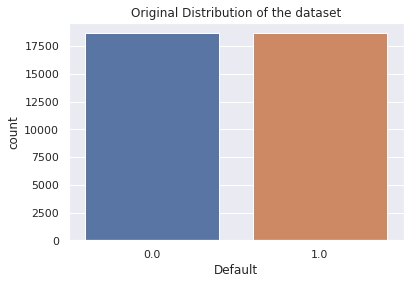

In [43]:
df_over = pd.DataFrame(X_over, columns = df.columns.drop(['Default']))
df_over['Default'] = y_over
sns.countplot(df_over['Default'])
plt.title('Original Distribution of the dataset')

In [44]:
df_over.shape

(37314, 22)

lets see the diffrence in training now 

In [45]:

xs = np.array(df_over.drop(["Default"], axis=1)).astype("float32")
ys = np.array(df_over["Default"]).astype("float32")
RF.fit(xs, ys)
balnced_train_predictions = RF.predict(xs)

Accuracy (training): 0.7062496650050919
Precision (training): 0.7709096029287524
Recall (training): 0.5869110789515999


Text(0.5, 1, 'Confusion Matrix')

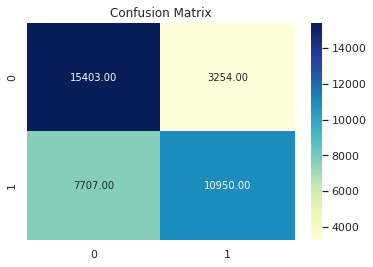

In [46]:
print("Accuracy (training):", accuracy_score(ys, balnced_train_predictions))
print("Precision (training):", precision_score(ys, balnced_train_predictions))
print("Recall (training):", recall_score(ys, balnced_train_predictions))

confusion_matrix_tab =  confusion_matrix(ys, balnced_train_predictions)
sns.heatmap(confusion_matrix_tab, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')

now we can see the recall got higher but still not ideal 

lets try diffrent algorithm

In [47]:
!pip install xgboost

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [48]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

XGB_model = XGBClassifier()
XGB_model.fit(xs, ys)
balnced_XGB_train_predictions = XGB_model.predict(xs)


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy (training): 0.8694859838130461
Precision (training): 0.8693276185373694
Recall (training): 0.8697003805542156


Text(0.5, 1, 'Confusion Matrix')

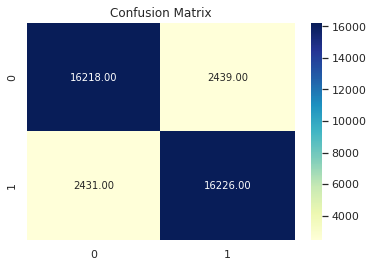

In [49]:
print("Accuracy (training):", accuracy_score(ys, balnced_XGB_train_predictions))
print("Precision (training):", precision_score(ys, balnced_XGB_train_predictions))
print("Recall (training):", recall_score(ys, balnced_XGB_train_predictions))

confusion_matrix_tab =  confusion_matrix(ys, balnced_XGB_train_predictions)
sns.heatmap(confusion_matrix_tab, annot=True, fmt='.2f', cmap="YlGnBu").set_title('Confusion Matrix')

with XGBboost Accuracy got even better